#### Linear Regression for the AutoMPG dataset

In [1]:
import pandas as pd
import numpy as np
from pandas.plotting import scatter_matrix
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

#### Read the data and add column headers

In [2]:
col_names = ['mpg', 'cylinders', 'displacement', 'horsepower', 'weight', 'acceleration', 'model_year', 'origin', 'car_name']
df = pd.read_csv("data/auto-mpg.csv", header=None, names=col_names)
df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,car_name
0,18.0,8,307.0,130.0,3504,12.0,70,"1\t""chevrolet chevelle","malibu"""
1,15.0,8,350.0,165.0,3693,11.5,70,"1\t""buick skylark 320""",NaN
2,18.0,8,318.0,150.0,3436,11.0,70,"1\t""plymouth satellite""",NaN
3,16.0,8,304.0,150.0,3433,12.0,70,"1\t""amc rebel sst""",NaN
4,17.0,8,302.0,140.0,3449,10.5,70,"1\t""ford torino""",NaN


#### Drop the origin and car_name columns as they are irrelevent text columns

In [3]:
df = df.drop(columns=['origin', 'car_name'])

#### Explore the data

In [4]:
df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year
0,18.0,8,307.0,130.0,3504,12.0,70
1,15.0,8,350.0,165.0,3693,11.5,70
2,18.0,8,318.0,150.0,3436,11.0,70
3,16.0,8,304.0,150.0,3433,12.0,70
4,17.0,8,302.0,140.0,3449,10.5,70


In [5]:
df.describe()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year
count,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000
mean,23.445918,5.471939,194.411990,104.469388,2977.584184,15.541327,75.979592
std,7.805007,1.705783,104.644004,38.491160,849.402560,2.758864,3.683737
min,9.000000,3.000000,68.000000,46.000000,1613.000000,8.000000,70.000000
25%,17.000000,4.000000,105.000000,75.000000,2225.250000,13.775000,73.000000
50%,22.750000,4.000000,151.000000,93.500000,2803.500000,15.500000,76.000000
75%,29.000000,8.000000,275.750000,126.000000,3614.750000,17.025000,79.000000
max,46.600000,8.000000,455.000000,230.000000,5140.000000,24.800000,82.000000


***No missing values after modifying the dataset***

In [6]:
df.corr()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year
mpg,1.000000,-0.777618,-0.805127,-0.778427,-0.832244,0.423329,0.580541
cylinders,-0.777618,1.000000,0.950823,0.842983,0.897527,-0.504683,-0.345647
displacement,-0.805127,0.950823,1.000000,0.897257,0.932994,-0.543800,-0.369855
horsepower,-0.778427,0.842983,0.897257,1.000000,0.864538,-0.689196,-0.416361
weight,-0.832244,0.897527,0.932994,0.864538,1.000000,-0.416839,-0.309120
acceleration,0.423329,-0.504683,-0.543800,-0.689196,-0.416839,1.000000,0.290316
model_year,0.580541,-0.345647,-0.369855,-0.416361,-0.309120,0.290316,1.000000


***Strong negative coorelations between mpg and few other columns***

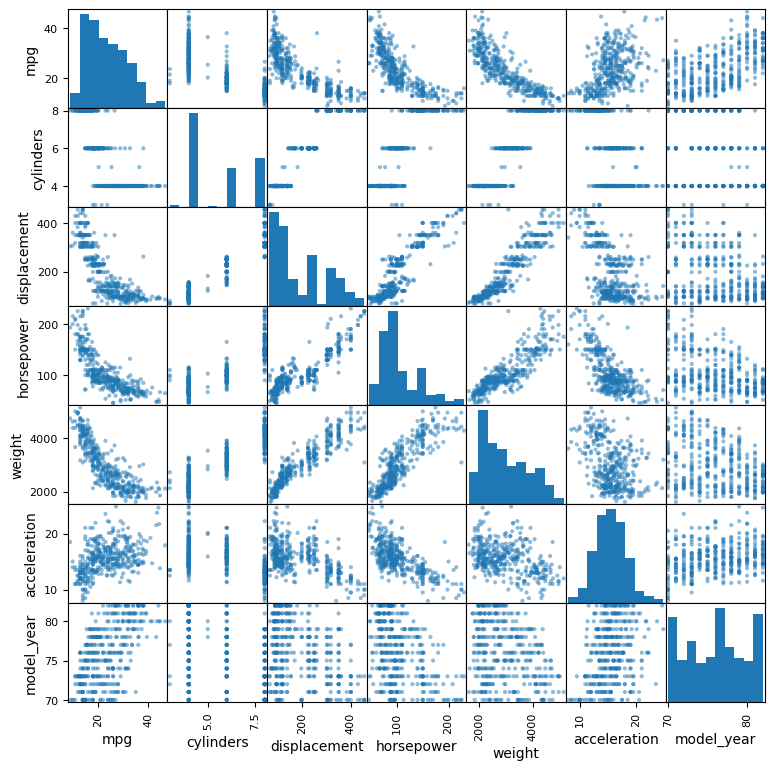

In [7]:
scatter_matrix(df, figsize=(9,9))
plt.savefig('plots/Regression_autompg_Scatter.png')
plt.show()


***From the scatter matrix we can see that there are some linear and polynomial relationships anong features and targets***

#### Prepare the Data

In [8]:
X = df.drop(columns='mpg')
y = df.mpg

#### Split into Trainig and Test Data

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(294, 6)
(98, 6)
(294,)
(98,)


#### Building the model

In [10]:
model = LinearRegression()
model.fit(X_train, y_train)
print('intercept:', model.intercept_)
print('slope:', model.coef_)
print('R^2:', model.score(X_train, y_train))

intercept: -17.84628767362116
slope: [-0.00323924  0.00576044  0.00700181 -0.00716557  0.19598915  0.75808698]
R^2: 0.8042173855482049


#### Evaluating the model with test data

In [11]:
yhat = model.predict(X_test)
print('RMSE:', mean_squared_error(y_test, yhat, squared=False))

RMSE: 3.6266001925857627


***Model has R^2 value of 0.804 and RMSE value of 3.626***

#### Square the quadratic terms, re-build the model and evaluate

In [12]:
X = df.drop('mpg', axis='columns')
y = df.mpg

X['horsepowerSquared'] = np.square(X.horsepower)
X['displacementSquared'] = np.square(X.displacement)
X['weightSquared'] = np.square(X.weight)

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

model = LinearRegression()
model.fit(X_train, y_train)

print('R squared:', model.score(X,y))
yhat = model.predict(X_test)
print('RMSE', mean_squared_error(y_test, yhat, squared=False))

R squared: 0.8619654305669336
RMSE 3.102909707786726


***The R^2 value increased to 0.861, RMSE has gone down to 3.102. The model has improved and is better on previously unseen data***